<a href="https://colab.research.google.com/github/Natalys2003/Machine-learn/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#–õ–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è

##–í—ã–±–æ—Ä –∏ –∏—Å–∫–ª—é—á–µ–Ω–∏–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö

–ó–∞–≥—Ä—É–∑–∏—Ç–µ –Ω–∞–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö –∏–∑ —Ñ–∞–π–ª–∞ ```Regressions datasets``` –≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–∏ —Å –≤–∞—à–∏–º –≤–∞—Ä–∏–∞–Ω—Ç–æ–º (–æ —Å–º–µ–Ω–µ –¥–∞—Ç–∞—Å–µ—Ç–∞ - –∏–Ω–¥–∏–≤–∏–¥—É–∞–ª—å–Ω–æ)

In [26]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import pandas as pd
df = pd.read_csv("/content/gladiator_data.csv")


df['Battle Experience'] = [1 if item == 'Yes' else 0 for item in df['Battle Experience']]

df
df.info()

<ipython-input-26-ff3f9926dae8>:7: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/gladiator_data.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83714 entries, 0 to 83713
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name                     83714 non-null  object 
 1   Age                      83714 non-null  int64  
 2   Birth Year               83714 non-null  int64  
 3   Origin                   83714 non-null  object 
 4   Height                   83714 non-null  int64  
 5   Weight                   83714 non-null  int64  
 6   Category                 83714 non-null  object 
 7   Wins                     83714 non-null  int64  
 8   Losses                   83714 non-null  int64  
 9   Special Skills           83714 non-null  object 
 10  Weapon of Choice         83714 non-null  object 
 11  Patron Wealth            83714 non-null  object 
 12  Equipment Quality        83714 non-null  object 
 13  Public Favor             83714 non-null  float64
 14  Injury History        

### –ü—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑

1. –í—ã–±—Ä–∞—Ç—å —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é Y (Y - —á–∏—Å–ª–æ–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è –¥–ª—è –∑–∞–¥–∞—á–∏ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏)
2. –° –ø–æ–º–æ—â—å—é EDA (—Å–º –ø—Ä–∞–∫—Ç–∏–∫–∞) –æ—Ç–æ–±—Ä–∞—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∏, –∫–æ—Ç–æ—Ä—ã–µ –≤–ª–∏—è—é—Ç –Ω–∞ Y (–º–æ–∂–Ω–æ –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å –≥–∞—Ä—Ñ–∏—á–µ—Å–∫–∏, –º–æ–∂–Ω–æ —á–∏—Å–ª–∞–º–∏).
3. –û–±—Ä–∞–±–æ—Ç–∞—Ç—å –ø—Ä–æ–ø—É—Å–∫–∏, –ø—Ä–∏ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç–∏ –ø–æ—á–∏—Å—Ç–∏—Ç—å –æ—Ç –≤—ã–±—Ä–æ—Å–æ–≤ (—Ç—É—Ç –≤–∞–∂–Ω–æ–µ –∑–∞–º–µ—á–∞–Ω–∏–µ - –Ω–µ –≤—Å–µ –≤—ã–±—Ä–æ—Å—ã —ç—Ç–æ –ø–ª–æ—Ö–æ)
4. –û–±–æ—Å–Ω–æ–≤–∞—Ç—å –≤—ã–±–æ—Ä –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –¥–ª—è –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è (–∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è, —Ä–∞–∑–ª–∏—á–∏—è –ø–æ –∫–ª–∞—Å—Å–∞–º, –∏ —Ç–∞–∫ –¥–∞–ª–µ–µ)

P.S. –í–∞–∂–Ω–æ–µ –∑–∞–º–µ—á–∞–Ω–∏–µ, —Å–ª–∏—à–∫–æ–º —É–Ω–∏–∫–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ (–∏–º–µ–Ω–∞ –ª—é–¥–µ–π, –Ω–∞–∑–≤–∞–Ω–∏—è –≥–æ—Ä–æ–¥, ID —é–∑–µ—Ä–∞ –∏–ª–∏ —á–µ–≥–æ-—Ç–æ –µ—â–µ - –Ω–µ –±–µ—Ä–µ–º, —Ç–∞–∫ –∫–∞–∫ –æ–Ω–∏ –Ω–µ –≤–ª–∏—è—é—Ç –Ω–∞ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é, –∞ –µ—Å–ª–∏ –∏ –≤–ª–∏—è–µ—Ç, —Ç–æ —ç—Ç–æ —Å–ª—É—á–∞–π–Ω–æ)

In [27]:
X = df
y = df['Wins'] # —Ü–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è
X = X.drop('Wins', axis=1) # –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train, y_test # 1279 —Å—Ç—Ä–æ–∫ –Ω–∞ –æ—É–±—á–µ–Ω–∏–µ –∏ 320 —Å—Ç—Ä–æ–∫ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏—é

(76970     8
 50932    12
 578      12
 47860     5
 29154    10
          ..
 6265      4
 54886    13
 76820     6
 860      12
 15795    11
 Name: Wins, Length: 66971, dtype: int64,
 67703    11
 19281    16
 79430    12
 6748      3
 29078     5
          ..
 48681     9
 50860     9
 8934     14
 83355     5
 24540     8
 Name: Wins, Length: 16743, dtype: int64)

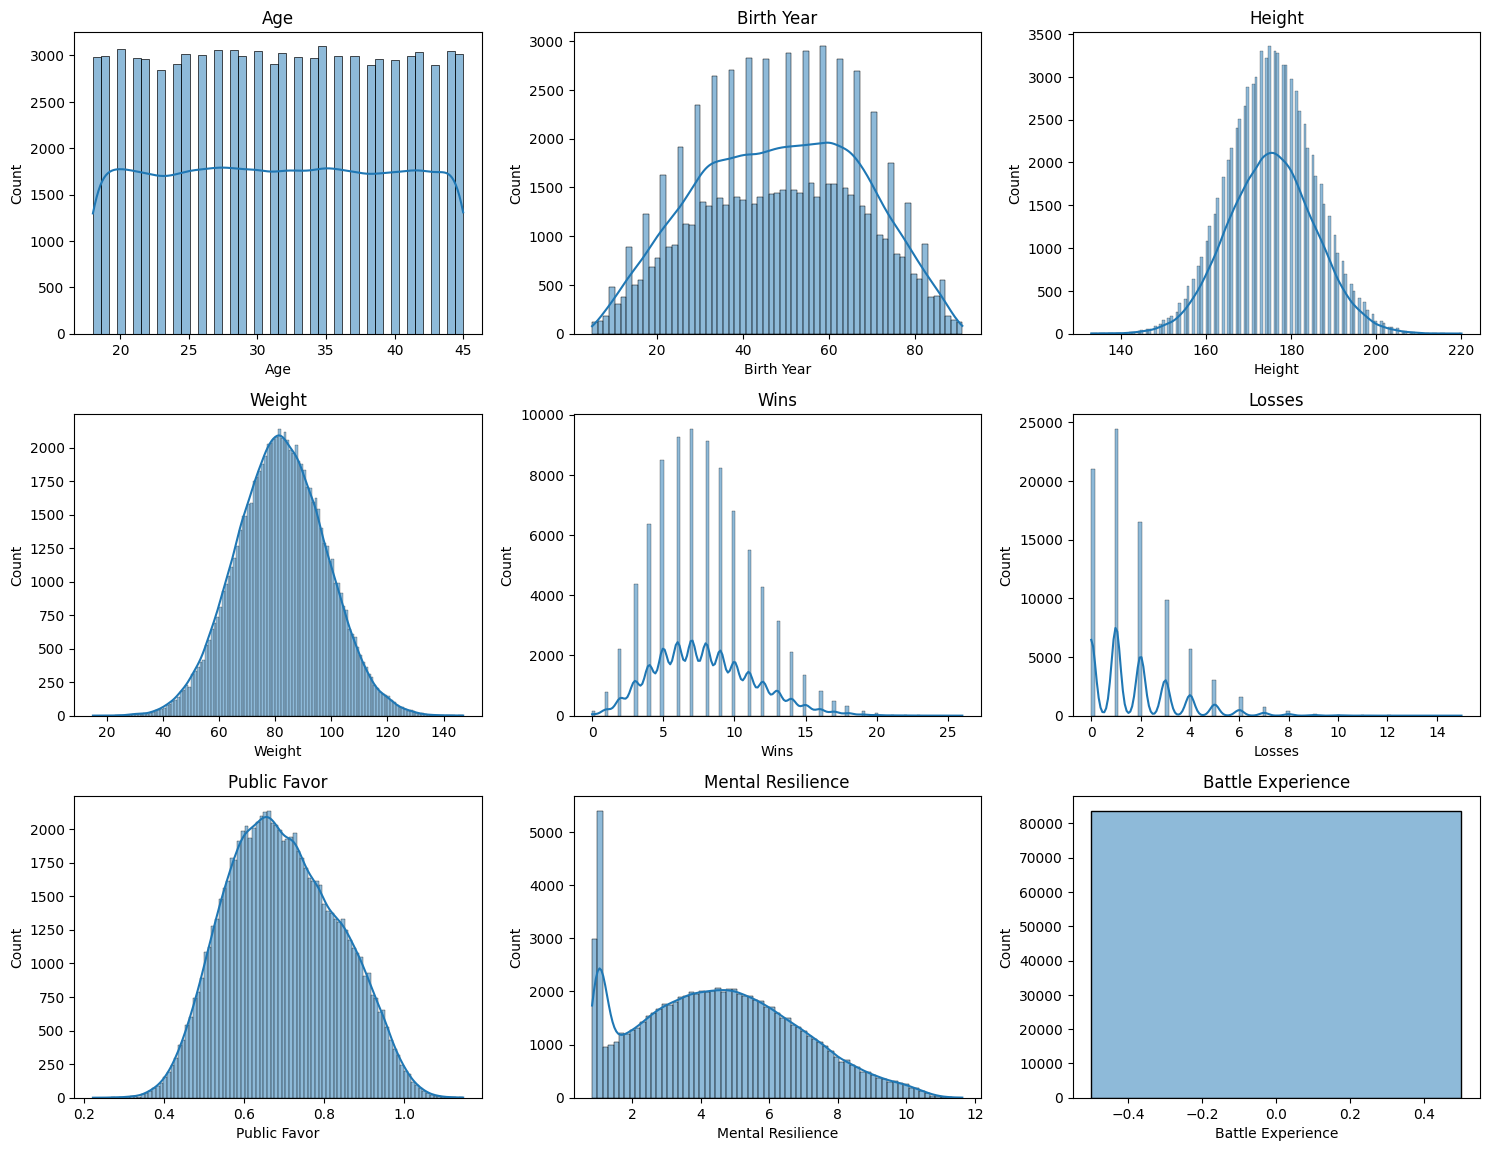

In [28]:
num_columns = df.select_dtypes(include=['float64', 'int64']).columns  # –≤—ã–±–∏—Ä–∞–µ–º —á–∏—Å–ª–≤–æ—ã–µ –∫–æ–ª–æ–Ω–∫–∏
cat_columns  = df.select_dtypes(include=['category']).columns # –≤—ã–±–∏—Ä–∞–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –∫–æ–ª–æ–Ω–∫–∏
plt.figure(figsize=(15, 15))

for i, column in enumerate(num_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

<Axes: xlabel='Battle Experience', ylabel='Wins'>

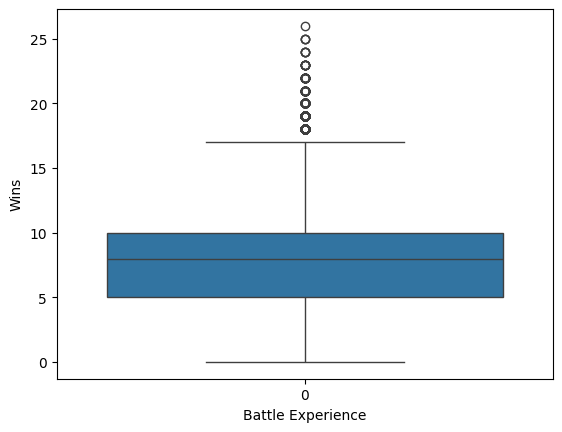

In [29]:
sns.boxplot(data=df, x='Battle Experience', y='Wins')

<ipython-input-30-c9872dbd6b35>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


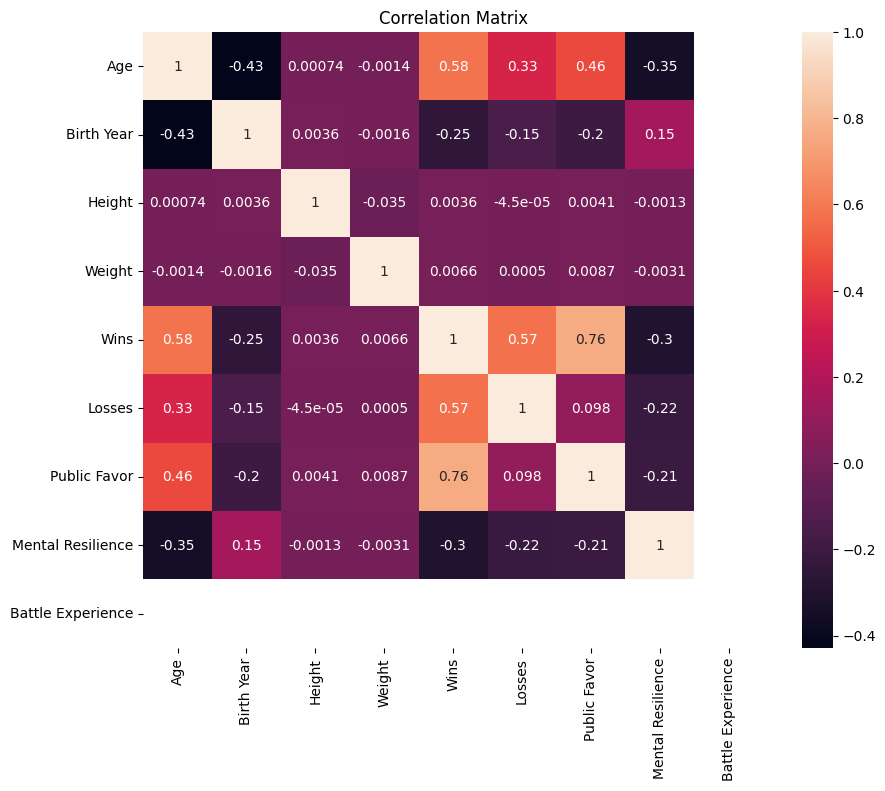

In [30]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

### –¢—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü–∏—è –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö

(OneHotEncode –¥–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö)

(Standard or MinMax or –±–∏–Ω–∏–Ω–≥ –∏–ª–∏ –¥—Ä—É–≥–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –¥–ª—è —á–∏—Å–ª–æ–≤—ã—Ö)

P.S. –¶–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é –Ω–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤—ã–≤–∞–µ–º, –æ—Å—Ç–∞–≤–ª—è–µ–º –∫–∞–∫ –µ—Å—Ç—å


In [32]:
df2 = df[['Battle Experience', 'Losses', 'Wins']]


In [34]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

def transform_dataframe(df2):
    # –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –Ω–∞–ª–∏—á–∏–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö —Å—Ç–æ–ª–±—Ü–æ–≤
    required_columns = ['Battle Experience', 'Losses']
    if not all(column in df.columns for column in required_columns):
        raise ValueError("DataFrame must contain the required columns.")

    # –°–æ–∑–¥–∞–Ω–∏–µ –∫–æ–ø–∏–∏ DataFrame, —á—Ç–æ–±—ã –Ω–µ –∏–∑–º–µ–Ω—è—Ç—å –∏—Å—Ö–æ–¥–Ω—ã–π df
    df_transformed = df.copy()

    # –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –ø–µ—Ä–≤—ã—Ö —á–µ—Ç—ã—Ä–µ—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –ø–æ–º–æ—â—å—é StandardScaler
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df_transformed[required_columns[:-1]])

    # –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ 'ph_bins' —Å –ø–æ–º–æ—â—å—é pd.get_dummies
    ph_bins_dummies = pd.get_dummies(df_transformed['Battle Experience'], prefix='H')

    # –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ dummy –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
    df_transformed = pd.DataFrame(scaled_features, columns=required_columns[:-1])
    df_transformed = pd.concat([df_transformed, ph_bins_dummies], axis=1)

    return df_transformed

df_research = transform_dataframe(df[['Battle Experience', 'Losses']])
pd.concat([df_research, df['Wins'], ], axis=1)

Battle Experience  H_0  Wins
0                    0.0    1     4
1                    0.0    1    10
2                    0.0    1     6
3                    0.0    1     7
4                    0.0    1     5
...                  ...  ...   ...
83709                0.0    1     7
83710                0.0    1     5
83711                0.0    1     4
83712                0.0    1     9
83713                0.0    1    11

[83714 rows x 3 columns]

### –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö

–î–ª—è –Ω–∞—á–∞–ª–∞, —Ä–∞–∑–¥–µ–ª–∏—Ç—å –¥–∞–Ω–Ω—ã–µ –Ω–∞ X –∏ Y

–†–∞–∑–±–∏—Ç—å –¥–∞–Ω–Ω—ã–µ –Ω–∞ —Ç–µ—Å—Ç–æ–≤—É—é –∏ –æ–±—É—á–∞—é—â—É—é –≤—ã–±–æ—Ä–∫–∏

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# –í—ã–±–æ—Ä–∫–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
X = df_research
y = df['Wins']

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫–∏
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def compute_regression(X, y):
  # –°–æ–∑–¥–∞–Ω–∏–µ –∏ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
  model = LinearRegression()
  model.fit(X, y)

  return model


def compute_metrics(y, predicted):
  # –û—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏
  mae = mean_absolute_error(y, predicted)
  mse = mean_squared_error(y, predicted)
  r2 = r2_score(y, predicted)
  mape = mean_absolute_percentage_error(y, predicted)

  return {
      'MAE': mae,
      'MSE': mse,
      'R2': r2,
      'mape (reverted - % –≤–µ—Ä–Ω–æ —É–≥–∞–¥–∞–Ω—ã—Ö)': (1 - mape) * 100,
      'mape (original - % –æ—à–∏–±–æ–∫)': mape * 100,
  }


In [36]:
model = compute_regression(X_train, y_train) # –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ (–ø—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ)
y_pred = model.predict(X_train)

compute_metrics(y_train, y_pred)

{'MAE': 2.7788779761146816,
 'MSE': 12.045558963202476,
 'R2': 0.0,
 'mape (reverted - % –≤–µ—Ä–Ω–æ —É–≥–∞–¥–∞–Ω—ã—Ö)': -6947319204067881.0,
 'mape (original - % –æ—à–∏–±–æ–∫)': 6947319204067981.0}

In [37]:
y_pred = model.predict(X_test)
compute_metrics(y_test, y_pred)

{'MAE': 2.761978446192807,
 'MSE': 11.84265204250112,
 'R2': -3.3648681289299986e-05,
 'mape (reverted - % –≤–µ—Ä–Ω–æ —É–≥–∞–¥–∞–Ω—ã—Ö)': -6575990215295410.0,
 'mape (original - % –æ—à–∏–±–æ–∫)': 6575990215295510.0}

In [38]:

coefficients = model.coef_
coefficients

array([0., 0.])

### –û–±—É—á–µ–Ω–∏–µ
#### 1 –†–µ–≥—Ä–µ—Å—Å–∏—è
- –û–±—É—á–∏—Ç—å –ª–∏–Ω–µ–π–Ω—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
- –°–¥–ª–µ–∞—Ç—å .predict() –¥–ª—è X_train, X_test
- –†–∞—Å—Å—á–∏—Ç–∞—Ç—å –º–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ MAE, MSE, MAPE, R2
- –í—ã–≤–µ—Å—Ç–∏ –∏ –Ω–∞–ø–∏—Å–∞—Ç—å –≤—ã–≤–æ–¥—ã –æ –∫–æ—ç—Ñ–∏—Ü–∏–µ–Ω—Ç–∞—Ö —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
- –ù–∞–ø–∏—Å–∞—Ç—å —Ñ–æ—Ä–º—É–ª—É —Ä–µ–≥—Ä–µ—Å—Å–∏–∏

–°–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥—ã –æ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–∏ –º–æ–¥–µ–ª–∏ (—Å–º –º–µ—Ç—Ä–∏–∫–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ) —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥—ã –æ –º–µ—Ç—Ä–∏–∫–∞—Ö –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ

#### 2 –ë–ª–∏–∂–∞–π—à–∏–µ —Å–æ—Å–µ–¥–∏
- –û–±—É—á–∏—Ç—å KNN (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)
- –°–¥–ª–µ–∞—Ç—å .predict() –¥–ª—è X_train, X_test
- –†–∞—Å—Å—á–∏—Ç–∞—Ç—å –º–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ MAE, MSE, MAPE, R2

–°–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥—ã –æ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–∏ –º–æ–¥–µ–ª–∏ (—Å–º –º–µ—Ç—Ä–∏–∫–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ) —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥—ã –æ –º–µ—Ç—Ä–∏–∫–∞—Ö –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ

In [39]:
X.shape

(83714, 2)

In [40]:
X_train.shape

(66971, 2)

In [41]:
import numpy as np

def linear_regression(X, y, learning_rate=0.01, max_iter=1000):
    m = len(y)
    X = np.c_[np.ones(m), X]
    theta = np.zeros(X.shape[1])
    prev_theta = np.zeros(X.shape[1])
    unchanged_count = 0

    for iteration in range(max_iter):
        gradients = -2/m * X.T.dot(y - X.dot(theta))
        prev_theta = theta.copy()
        theta -= learning_rate * gradients

        if np.allclose(prev_theta, theta):
            unchanged_count += 1
        else:
            unchanged_count = 0

        if unchanged_count >= 5:
            break


    print('–∫–æ—ç—Ñ—Ü–∏–µ–Ω—Ç—ã —Ä–µ–≥—Ä–µ—Å—Å–∏–∏: ', theta)
    return X.dot(theta)
regr = LinearRegression()

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))
y_pred = regr.predict(X)
X = np.array(X_train)
y = np.array(y_train)


y_pred = linear_regression(X, y)

compute_metrics(y, y_pred)


-3.3648681289299986e-05
–∫–æ—ç—Ñ—Ü–∏–µ–Ω—Ç—ã —Ä–µ–≥—Ä–µ—Å—Å–∏–∏:  [3.94236984 0.         3.94236984]


{'MAE': 2.7789039480298214,
 'MSE': 12.045561379338302,
 'R2': -2.005831223339527e-07,
 'mape (reverted - % –≤–µ—Ä–Ω–æ —É–≥–∞–¥–∞–Ω—ã—Ö)': -6945949884044427.0,
 'mape (original - % –æ—à–∏–±–æ–∫)': 6945949884044527.0}

In [45]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()
neigh.fit(X_train, y_train)
print(neigh.predict(X_test).round(2))
print(neigh.predict(X_train))

"""y_pred = knn_regressor(X_train, y_train.to_numpy(), X_test, k=3)"""
compute_metrics(y_test, y_pred)


KeyboardInterrupt: 

In [44]:
pd.DataFrame({'y_pred': y_pred, 'y_test': y_test})

ValueError: array length 66971 does not match index length 16743

##–ó–∞–¥–∞–Ω–∏–µ –¥–ª—è –≥–µ–Ω–∏–µ–≤*

–£–¥–∞—á–∏ üòà

–í –ø—Ä–∞–∫—Ç–∏–∫–µ –µ—Å—Ç—å –ø—Ä–∏–º–µ—Ä—ã —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–∏ ```linear_regression``` –∏ ```knn_regressor```, –Ω–æ –µ—Å—Ç—å –Ω—é–∞–Ω—Å... –°–µ–π—á–∞—Å –Ω–∏ linear_regression, –Ω–∏ knn_regressor –Ω–µ –ø–æ–¥–¥–µ—Ä–∂–∏–≤–∞—é—Ç —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è —Å–æ—Å—Ç–æ—è–Ω–∏—è –¥–ª—è –ø–æ—Å–ª–µ–¥—É—é—â–µ–≥–æ –≤–æ–∑–º–æ–∂–Ω–æ–≥–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è.

–ù–µ–æ–±—Ö–æ–¥–∏–º–æ - —Ä–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å –¥–≤–∞ –∫–ª–∞—Å—Å–∞ LinearRegression –∏ KNNRegression (–ø—Ä–∏–º–µ—Ä—ã –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–∫ –µ—Å—Ç—å). –í —ç—Ç–∏—Ö –∫–ª–∞—Å—Å–∞—Ö –æ–±—è–∑–∞—Ç–ª—å–Ω–æ –¥–æ–ª–∂–Ω—ã –±—ã—Ç—å –¥–≤–∞ –º–µ—Ç–æ–¥–∞
```
.fit(X: np.array, y: np.array) -> None - –æ–±—É—á–∏—Ç—å –º–æ–¥–µ–ª—å –∏ —Å–æ—Ö—Ä–∞–Ω–∏—Ç—å –≤–Ω—É—Ç—Ä–µ–Ω–Ω–µ–µ —Å–æ—Å—Ç–æ—è–Ω–∏–µ –º–æ–¥–µ–ª–∏
.predict(X) -> np.array - –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç—å y –Ω–∞ –æ—Å–Ω–æ–≤–µ X
```
–ü—Ä–∏ –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏ –∫–ª–∞—Å—Å–∞ - –ø–µ—Ä–µ–¥–∞–≤–∞—Ç—å –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏ –≤ –º–æ–º–µ–Ω—Ç –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏. –ù–∞–ø—Ä–∏–º–µ—Ä:

```
model = LinearRegression(**params)

model.fit(X_train, y_train)
model.predict(X_test)
```

–í –∫–∞—á–µ—Å—Ç–≤–µ —Ç–µ—Å—Ç–æ–≤ –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å KNN –∏ LinearRegression –∏–∑ sklearn, —Ä–µ–∑—É–ª—å—Ç–∞—Ç —Ä–∞–±–æ—Ç—ã –≤–∞—à–∏—Ö –æ–±—ä–µ–∫—Ç–æ–≤ –¥–æ–ª–∂–µ–Ω –ø—Ä–∏–º–µ—Ä–Ω–æ —Å–æ–≤–ø–∞–¥–∞—Ç—å —Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏ —Ä–∞–±–æ—Ç—ã –æ–±—ä–µ–∫—Ç–æ–≤ –∏–∑ sklearn

–í —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ —Ä–∞–±–æ—Ç—ã —Å–¥–µ–ª–∞—Ç—å —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ —Å —Ç–µ–º–∏ –∂–µ –¥–∞–Ω–Ω—ã–º–∏ –≤ sklearn

In [ ]:
"""
–†–µ–∑—É–ª—å—Ç–∞—Ç —Ä–∞–±–æ—Ç—ã
"""